In [33]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [27]:
plt.style.use('ggplot')

In [2]:
# Load boston database
boston = datasets.load_boston()
type(boston)

sklearn.datasets.base.Bunch

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [13]:
X = boston.data
y = boston.target

In [14]:
# Load df
df = pd.DataFrame(X, columns=boston.feature_names)

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
# Get only the rooms
X_rooms = X[:,5]

In [17]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [18]:
# Reshape so sklearn does not explode
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

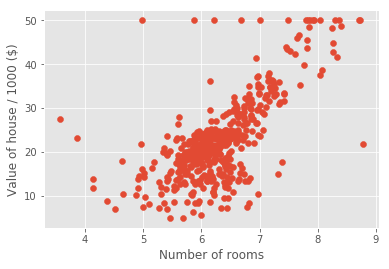

In [28]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [23]:
# Create model
reg = linear_model.LinearRegression()

# fit to data
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Check predictions
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

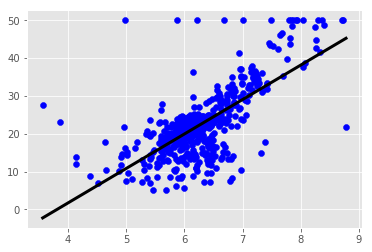

In [29]:
# Plot
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

In [31]:
# Separete database to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# Predict on the test set
y_pred = reg_all.predict(X_test)
score = reg_all.score(X_test, y_test)
print('Score, ie, R^2: {}'.format(score))

Score, ie, R^2: 0.7109203586326427


In [38]:
# K-fold Cross-validation
reg = linear_model.LinearRegression()

# Use 3 fold cross validation
%timeit cv_results_3 = cross_val_score(reg, X, y, cv=3)

# Use 10 fold cross validation
%timeit cv_results_10 = cross_val_score(reg, X, y, cv=10)

10 loops, best of 3: 10.2 ms per loop
10 loops, best of 3: 33.1 ms per loop


In [40]:
cv_results_10 = cross_val_score(reg, X, y, cv=10)

In [41]:
print(cv_results_10)

[ 0.73334917  0.47229799 -1.01097697  0.64126348  0.54709821  0.73610181
  0.37761817 -0.13026905 -0.78372253  0.41861839]


In [42]:
np.mean(cv_results)

0.35074135093251269

**Ridge Regression **
$$RIDGE = \sum{Errors^2} + \alpha * \sum{a_{i}^2}$$

In [43]:
# Ridge restriction to OLS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = linear_model.Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.69955650271004199

**Lasso Regression**
$$LASSO = \sum_{i=0}^{n}{Errors^2} + \alpha * \sum_{i=0}^{n}{\lvert{a_{i}\rvert }}  $$

In [44]:
# Ridge restriction to OLS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = linear_model.Lasso(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.59502292925878275

In [48]:
# Lasso to see wich feature is most important
names = df.columns
lasso = linear_model.Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

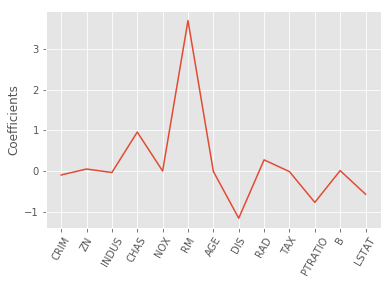

In [49]:
# Plot
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

In [50]:
# Define function to display changes in alphas
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

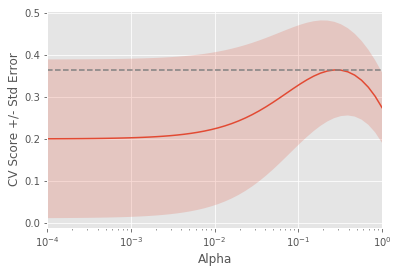

In [51]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = linear_model.Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)